In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture as GMM

In [2]:
# opening meta data of all gradients 1, 2, and 3
meta_data = pd.read_csv('sample_metadata.csv')
# creating dataframe of wanted columns
meta_df = meta_data[['SampleID', 'Cruise', 'Dataset', 'Datetime', 'Station', 'Latitude', 'Longitude', 'Depth']]
# lowercasing all column names
meta_df.columns = meta_df.columns.str.lower()

#resolved depth of 7 to 5, 41 to 40, 50 to 45, and 55 to 60
meta_df.loc[meta_df['depth'] == 7, 'depth'] = 5
meta_df.loc[meta_df['depth'] == 41, 'depth'] = 40
meta_df.loc[meta_df['depth'] == 50, 'depth'] = 45
meta_df.loc[meta_df['depth'] == 55, 'depth'] = 60

#creating merged df of Prochlorococcus and Synechococcus meta data and file with ecotypes
meta_df2 = meta_data[['SampleID', 'Cruise', 'Station', 'Datetime',
                   'Latitude', 'Longitude', 'Depth', 'Replicate']]

rel_abun = pd.read_csv('grad_relative_abundance.csv')

# another example of getting certain columns as a new dataframe
rel_abun2 = rel_abun[rel_abun.columns[~rel_abun.columns.isin(['Unnamed: 0','Transcripts','Reads', 'TPM'])]]
meta_abun = meta_df2.merge(rel_abun2)

# subsetting dataframes by genus
pro_meta_abun = meta_abun.loc[(meta_abun['Genus'] == 'Prochlorococcus') & (meta_abun['RelAbundance'] >= 0.05)]
syn_meta_abun = meta_abun.loc[(meta_abun['Genus'] == 'Synechococcus') & (meta_abun['RelAbundance'] >= 0.05)]

In [3]:
g1_fcm = pd.read_feather('g1_fcm.feather')
g1_fcm_df = g1_fcm[['filename', 'pop', 'norm.scatter', 'norm.red', 'norm.orange', 'station', 'lat', 'date', 'depth']]
pro_g1_fcm = g1_fcm_df.loc[g1_fcm_df['pop'] == 'prochloro']
syn_g1_fcm = g1_fcm_df.loc[g1_fcm_df['pop'] == 'synecho']

#subset dataframe to only gradient 1
g1_meta = meta_df.loc[meta_df['cruise'] == 'kok1606']
g1_ecotype_pro = pro_meta_abun.loc[pro_meta_abun['Cruise'] == 'kok1606']
g1_ecotype_syn = syn_meta_abun.loc[syn_meta_abun['Cruise'] == 'kok1606']

# merging the meta and fcm data for g1
g1_pro_meta_fcm = g1_meta.merge(pro_g1_fcm, on= ['station', 'depth'])
g1_syn_meta_fcm = g1_meta.merge(syn_g1_fcm, on= ['station', 'depth'])

In [4]:
new_g1_ecotype_pro = g1_ecotype_pro.groupby(['Station', 'Depth', 'Clade', 'Genus']).agg({
    'RelAbundance':'mean', 
    'SampleID':'first'
}).reset_index()
new_g1_ecotype_syn = g1_ecotype_syn.groupby(['Station', 'Depth', 'Clade', 'Genus']).agg({
    'RelAbundance':'mean', 
    'SampleID':'first'
}).reset_index()

In [5]:
g2_fcm = pd.read_feather('g2_FCM_distribution.feather')
g2_fcm_df = g2_fcm[['filename', 'pop', 'norm.scatter', 'norm.red', 'norm.orange', 'station', 'lat', 'date', 'depth']]
pro_g2_fcm = g2_fcm_df.loc[g2_fcm_df['pop'] == 'prochloro']
syn_g2_fcm = g2_fcm_df.loc[g2_fcm_df['pop'] == 'synecho']

#subset meta dataframe to only gradient 3
g2_meta = meta_df.loc[meta_df['cruise'] == 'mgl1704']
g2_ecotype_pro = pro_meta_abun.loc[pro_meta_abun['Cruise'] == 'mgl1704']
g2_ecotype_syn = syn_meta_abun.loc[syn_meta_abun['Cruise'] == 'mgl1704']

# merging the meta and fcm data for g2
g2_pro_meta_fcm = g2_meta.merge(pro_g2_fcm, on= ['station', 'depth'])
g2_syn_meta_fcm = g2_meta.merge(syn_g2_fcm, on= ['station', 'depth'])

In [6]:
new_g2_ecotype_pro = g2_ecotype_pro.groupby(['Station', 'Depth', 'Clade', 'Genus']).agg({
    'RelAbundance':'mean', 
    'SampleID':'first'
}).reset_index()
new_g2_ecotype_syn = g2_ecotype_syn.groupby(['Station', 'Depth', 'Clade', 'Genus']).agg({
    'RelAbundance':'mean', 
    'SampleID':'first'
}).reset_index()

In [7]:
g3_stations = pd.read_feather('g3_sample.feather')

g3_stations_df = g3_stations[['filename', 'pop', 'norm.scatter', 'norm.red', 'norm.orange', 'station', 'lat', 'date', 'depth']]
pro_g3_stations = g3_stations_df.loc[g3_stations_df['pop'] == 'prochloro']
syn_g3_stations = g3_stations_df.loc[g3_stations_df['pop'] == 'synecho']

#subset meta dataframe to only gradient 3
g3_meta = meta_df.loc[meta_df['cruise'] == 'km1906']
g3_ecotype_pro = pro_meta_abun.loc[pro_meta_abun['Cruise'] == 'km1906']
g3_ecotype_syn = syn_meta_abun.loc[syn_meta_abun['Cruise'] == 'km1906']


# merging the meta and fcm data for g3
g3_pro_meta_fcm = g3_meta.merge(pro_g3_stations, on= ['station', 'depth'])
g3_syn_meta_fcm = g3_meta.merge(syn_g3_stations, on= ['station', 'depth'])

In [8]:
new_g3_ecotype_pro = g3_ecotype_pro.groupby(['Station', 'Depth', 'Clade', 'Genus']).agg({
    'RelAbundance':'mean', 
    'SampleID':'first'
}).reset_index()
new_g3_ecotype_syn = g3_ecotype_syn.groupby(['Station', 'Depth', 'Clade', 'Genus']).agg({
    'RelAbundance':'mean', 
    'SampleID':'first'
}).reset_index()

In [9]:
def gmm_cluster(genus, gradient_num, sampleid, num_cluster):
    """
Arguemnts: 
genus = string (either 'pro' or 'syn') of the genus being plotted
gradient_num = integar that represents which FCM gradient set you want data to be taken from
sampleid = string that contains the sample ID from the meta and flowcycometry datasets
num_clusters = integar that represents the number of clusters wanted in your GMM

Returns:
Plotted GMM of data
    """
    if (gradient_num == 1) & (genus == 'pro'):
        # getting ecotype relative abundances and fcm data for pro
        clades = g1_ecotype_pro.loc[g1_ecotype_pro['SampleID'] == sampleid]
        fcm_data = g1_pro_meta_fcm.loc[g1_pro_meta_fcm['sampleid'] == sampleid]
    elif (gradient_num == 1) & (genus == 'syn'):
        # getting ecotype relative abundances and fcm data for syn
        clades = g1_ecotype_syn.loc[g1_ecotype_syn['SampleID'] == sampleid]
        fcm_data = g1_syn_meta_fcm.loc[g1_syn_meta_fcm['sampleid'] == sampleid]
    elif (gradient_num == 2) & (genus == 'pro'):
        # getting ecotype relative abundances and fcm data for pro
        clades = g2_ecotype_pro.loc[g2_ecotype_pro['SampleID'] == sampleid]
        fcm_data = g2_pro_meta_fcm.loc[g2_pro_meta_fcm['sampleid'] == sampleid]
    elif (gradient_num == 2) & (genus == 'syn'):
        # getting ecotype relative abundances and fcm data for syn
        clades = g2_ecotype_syn.loc[g2_ecotype_syn['SampleID'] == sampleid]
        fcm_data = g2_syn_meta_fcm.loc[g2_syn_meta_fcm['sampleid'] == sampleid]
    elif (gradient_num == 3) & (genus == 'pro'):
        # getting ecotype relative abundances and fcm data for pro
        clades = g3_ecotype_pro.loc[g3_ecotype_pro['SampleID'] == sampleid]
        fcm_data = g3_pro_meta_fcm.loc[g3_pro_meta_fcm['sampleid'] == sampleid]
    elif (gradient_num == 3) & (genus == 'syn'):
        # getting ecotype relative abundances and fcm data for syn
        clades = g3_ecotype_syn.loc[g3_ecotype_syn['SampleID'] == sampleid]
        fcm_data = g3_syn_meta_fcm.loc[g3_syn_meta_fcm['sampleid'] == sampleid]
        
    # creating empty value
    total_relabun = 0

    # setting relative abundance column values into a list
    original_relabun = clades['RelAbundance'].to_list()
            
    #finding the total of the clades presented
    for i in original_relabun:
        total_relabun = total_relabun + i

    #creating adjusted values of relative abundances
    adjusted_values = []
    for i in original_relabun:
        adjust = i/total_relabun
        adjusted_values.append(adjust)
    clades.insert(11, 'AdjustedRelAbun', adjusted_values)

    # plotting data with GMM with initialization
    gmm_cluster = GMM(num_cluster, random_state=6, weights_init=clades['AdjustedRelAbun'].values)
    scatter_red = fcm_data[['norm.scatter', 'norm.red']].to_numpy()
    matrix = np.log(scatter_red)
    gmm_labels = gmm_cluster.fit(matrix).predict(matrix)
    gmm_graph = plt.scatter(matrix[:, 0], matrix[:, 1], c=gmm_labels, s=20, cmap='viridis', alpha=0.25)

    station = pd.unique(clades['Station'])
    depth = pd.unique(clades['Depth'])
    
    plt.title('Station ' + str(station[0]) + ' Depth ' + str(depth[0]))
    plt.xlabel('Scatter')
    plt.ylabel('Red Chlorophyll')

    print(clades['AdjustedRelAbun'].values)
    return(gmm_graph, gmm_labels)

[0.41639914 0.58360086]


(<matplotlib.collections.PathCollection at 0x1800e390130>,
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64))

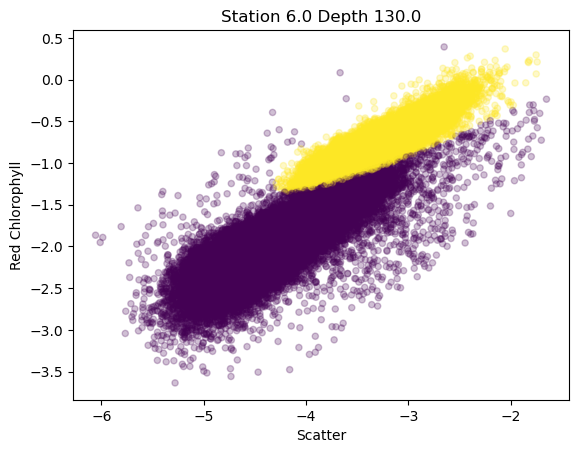

In [10]:
# example of calling onto function
gmm_cluster('pro', 3, 'G3.DEPTH.NS.S6C7.130m.B', 2)

[0.41639914 0.58360086]


C:\Users\User\AppData\Local\Temp\ipykernel_11556\2654653379.py:11: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  cluster_nums = pd.unique(clusters)


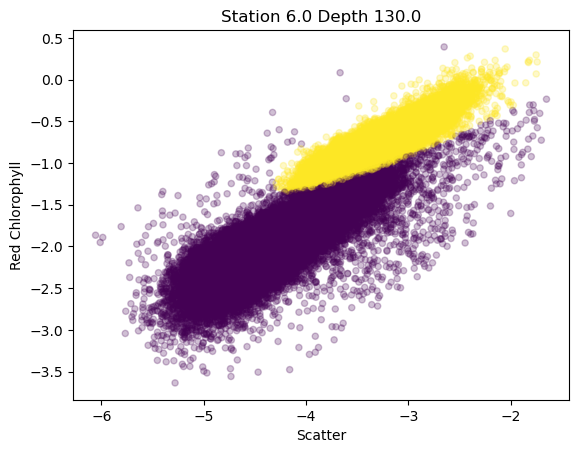

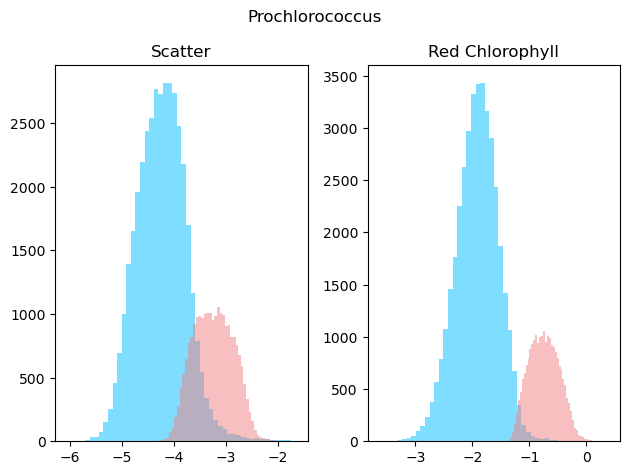

In [11]:
# used to find relabun values; pro_meta_abun.loc[pro_meta_abun['SampleID'] == 'G3.DEPTH.NS.S6C7.130m.B']
current_rel_abun_df = g3_ecotype_pro.loc[g3_ecotype_pro['SampleID'] == 'G3.DEPTH.NS.S6C7.130m.B']
current_rel_abun_df

graph, cluster = gmm_cluster('pro', 3, 'G3.DEPTH.NS.S6C7.130m.B', 2)
clusters = list(cluster)

fcm_df = g3_pro_meta_fcm.loc[g3_pro_meta_fcm['sampleid'] == 'G3.DEPTH.NS.S6C7.130m.B']

fcm_df.insert(1, 'cluster num', clusters)
cluster_nums = pd.unique(clusters)

fig, ax = plt.subplots(ncols=2)
colors = ['deepskyblue', 'lightcoral', 'violet']

for i in cluster_nums:
    wanted_fcm_cluster = fcm_df.loc[fcm_df['cluster num'] == i]
    ax[0].hist(np.log(wanted_fcm_cluster['norm.scatter']), bins=50, color = colors[i], alpha = 0.5)
    ax[1].hist(np.log(wanted_fcm_cluster['norm.red']), bins=50, color = colors[i], alpha = 0.5)
    
    fig.suptitle('Prochlorococcus')
    ax[0].set_title('Scatter')
    ax[1].set_title('Red Chlorophyll')

#ax.set_ylabel('Count')
fig.tight_layout()
plt.show()

(array([8.000e+00, 8.000e+00, 2.100e+01, 2.900e+01, 7.100e+01, 1.130e+02,
        1.910e+02, 2.800e+02, 4.290e+02, 5.320e+02, 6.430e+02, 7.750e+02,
        8.190e+02, 9.200e+02, 9.780e+02, 9.810e+02, 9.700e+02, 1.000e+03,
        1.011e+03, 1.006e+03, 9.550e+02, 9.820e+02, 1.053e+03, 1.009e+03,
        9.900e+02, 9.050e+02, 9.130e+02, 8.210e+02, 8.190e+02, 7.590e+02,
        6.780e+02, 5.900e+02, 4.470e+02, 3.330e+02, 2.310e+02, 1.560e+02,
        9.100e+01, 5.300e+01, 3.500e+01, 2.200e+01, 1.700e+01, 1.800e+01,
        1.200e+01, 7.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00]),
 array([-4.29263061, -4.2416087 , -4.19058679, -4.13956488, -4.08854297,
        -4.03752106, -3.98649915, -3.93547723, -3.88445532, -3.83343341,
        -3.7824115 , -3.73138959, -3.68036768, -3.62934577, -3.57832386,
        -3.52730195, -3.47628004, -3.42525813, -3.37423621, -3.3232143 ,
        -3.27219239, -3.22117048, -3.17014857, -3.11912666, -3.06810475,
        -3.

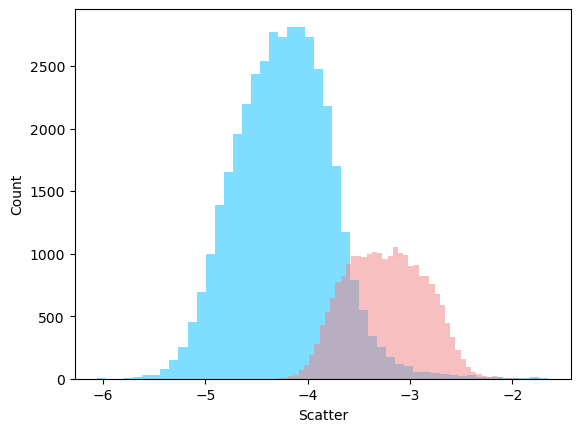

In [12]:
# GMM of scatter (size) of genus
zero_fcm_cluster = fcm_df.loc[fcm_df['cluster num'] == 0]
one_fcm_cluster = fcm_df.loc[fcm_df['cluster num'] == 1]

plt.xlabel('Scatter')
plt.ylabel('Count')

plt.hist(np.log(zero_fcm_cluster['norm.scatter']), bins=50, color = colors[0], alpha = 0.5)
plt.hist(np.log(one_fcm_cluster['norm.scatter']), bins=50, color = colors[1], alpha = 0.5)

(array([3.800e+01, 9.200e+01, 1.720e+02, 2.620e+02, 3.990e+02, 4.760e+02,
        6.010e+02, 6.500e+02, 7.290e+02, 7.830e+02, 8.830e+02, 9.300e+02,
        9.690e+02, 1.022e+03, 9.370e+02, 9.970e+02, 1.007e+03, 1.053e+03,
        9.510e+02, 1.007e+03, 9.860e+02, 9.210e+02, 9.000e+02, 8.530e+02,
        7.970e+02, 7.160e+02, 6.790e+02, 5.980e+02, 5.380e+02, 4.170e+02,
        3.620e+02, 2.890e+02, 1.990e+02, 1.300e+02, 1.060e+02, 6.200e+01,
        5.300e+01, 3.800e+01, 2.100e+01, 1.800e+01, 1.300e+01, 1.700e+01,
        7.000e+00, 6.000e+00, 0.000e+00, 5.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.33812776, -1.30403025, -1.26993274, -1.23583523, -1.20173771,
        -1.1676402 , -1.13354269, -1.09944518, -1.06534766, -1.03125015,
        -0.99715264, -0.96305513, -0.92895762, -0.8948601 , -0.86076259,
        -0.82666508, -0.79256757, -0.75847006, -0.72437254, -0.69027503,
        -0.65617752, -0.62208001, -0.5879825 , -0.55388498, -0.51978747,
        -0.

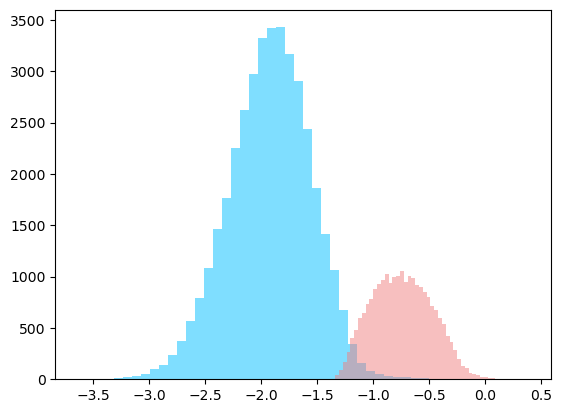

In [13]:
# GMM of red chorophyll of genus
plt.hist(np.log(zero_fcm_cluster['norm.red']), bins=50, color = colors[0], alpha = 0.5)
plt.hist(np.log(one_fcm_cluster['norm.red']), bins=50, color = colors[1], alpha = 0.5)

In [14]:
# Unique sample IDs of each gradient of Procholorcoccus and Synechococcus
unique_pro_g1_sample = pd.unique(new_g1_ecotype_pro['SampleID'])
unique_pro_g2_sample = pd.unique(new_g2_ecotype_pro['SampleID'])
unique_pro_g3_sample = pd.unique(new_g3_ecotype_pro['SampleID'])

unique_syn_g1_sample = pd.unique(new_g1_ecotype_syn['SampleID'])
unique_syn_g2_sample = pd.unique(new_g2_ecotype_syn['SampleID'])
unique_syn_g3_sample = pd.unique(new_g3_ecotype_syn['SampleID'])

[0.91279262 0.08720738]


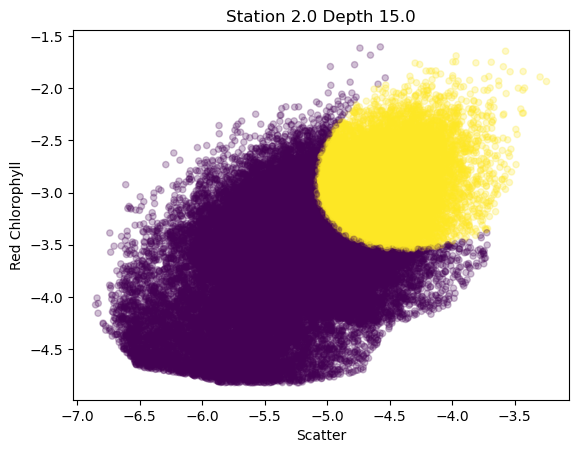

[0.51860959 0.48139041]


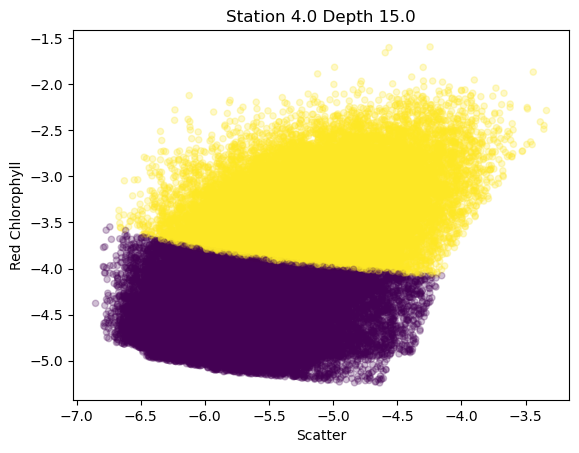

[0.41181156 0.58818844]


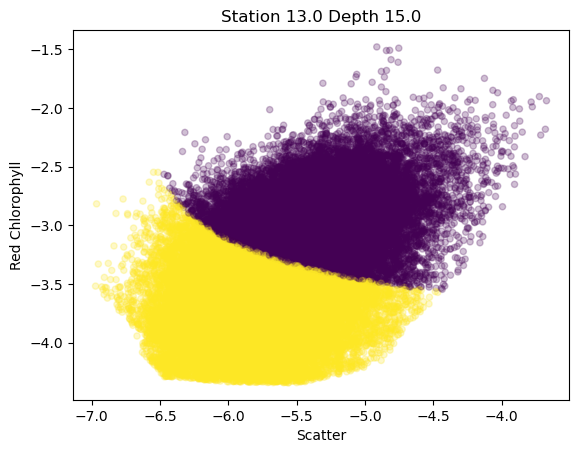

[0.07256168 0.8483518  0.07908652]


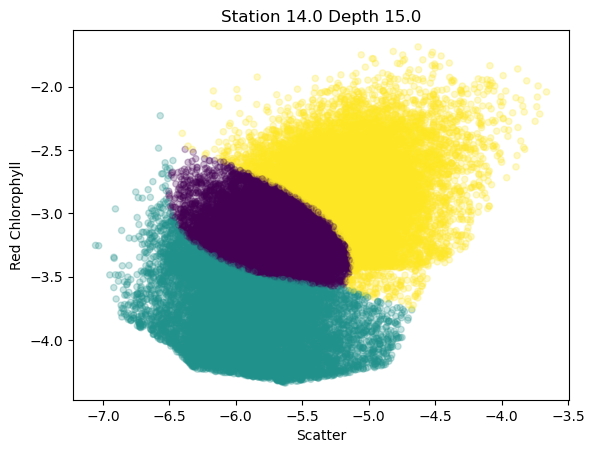

In [16]:
for i in unique_pro_g1_sample:
    current_rel_abun_df = new_g1_ecotype_pro.loc[new_g1_ecotype_pro['SampleID'] == i]
    if len(current_rel_abun_df['RelAbundance']) >= 2:
        num_clusters = len(current_rel_abun_df['RelAbundance'])
        plt.show(gmm_cluster('pro', 1, i, num_clusters))
    else:
        continue

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.11639143 0.88360857]


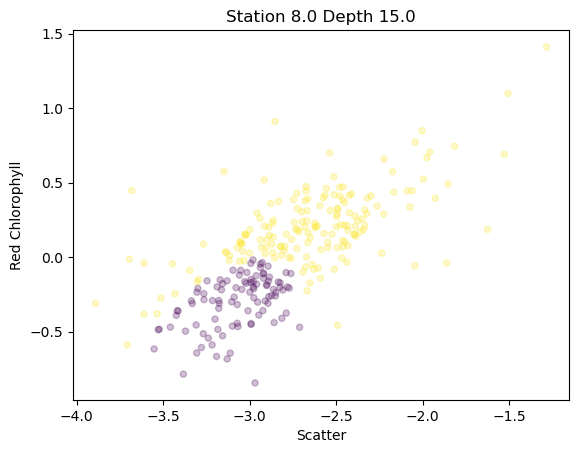

[0.09142276 0.90857724]


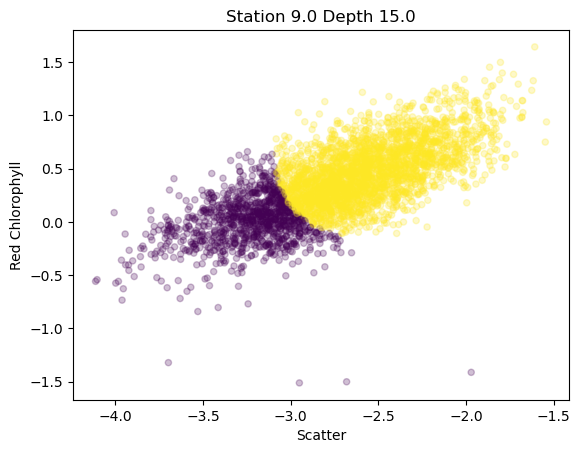

[0.12859946 0.87140054]


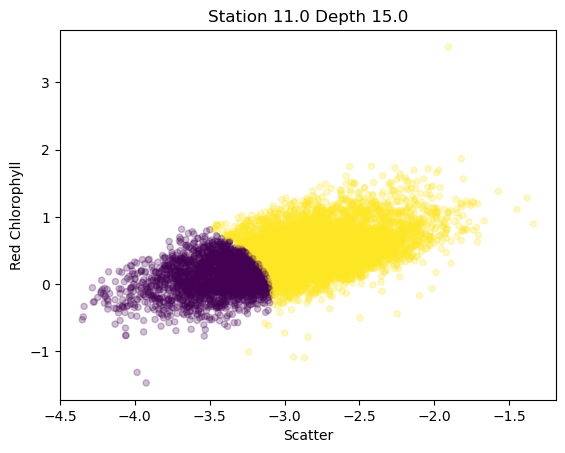

In [17]:
for i in unique_syn_g1_sample:
    current_rel_abun_df = new_g1_ecotype_syn.loc[new_g1_ecotype_syn['SampleID'] == i]
    if len(current_rel_abun_df['RelAbundance']) >= 2:
        num_clusters = len(current_rel_abun_df['RelAbundance'])
        plt.show(gmm_cluster('syn', 1, i, num_clusters))
    else:
        continue

[0.92227883 0.07772117]


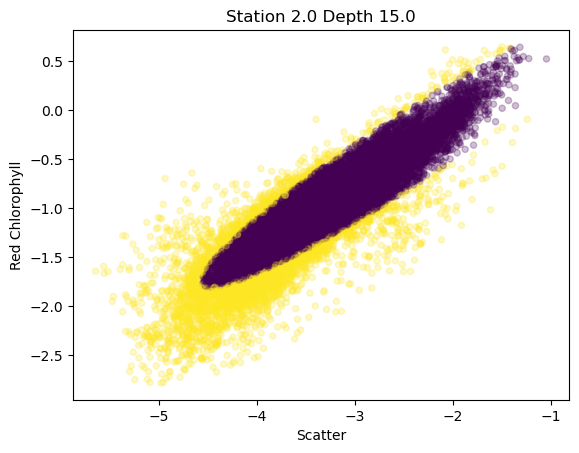

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.74891439 0.25108561]


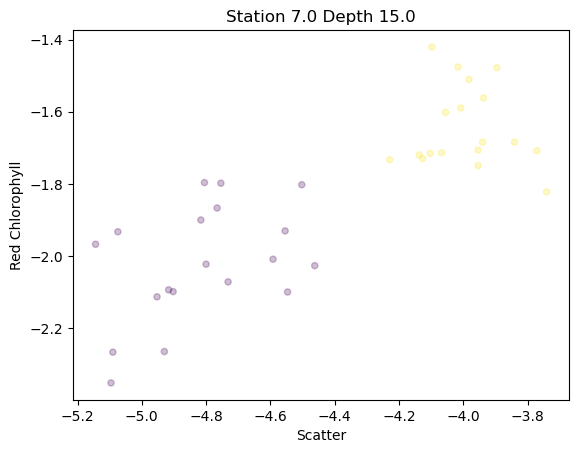

[0.77865086 0.22134914]


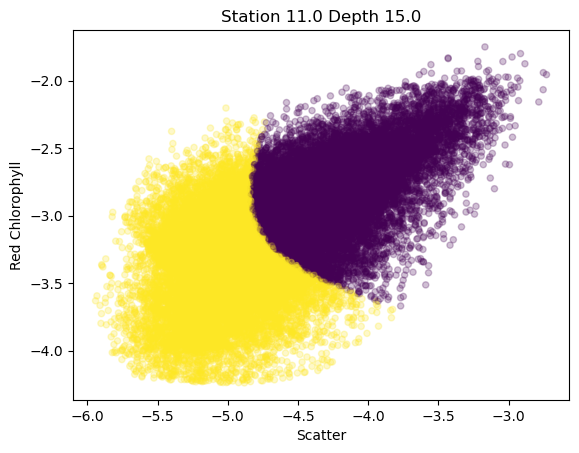

[0.15724411 0.84275589]


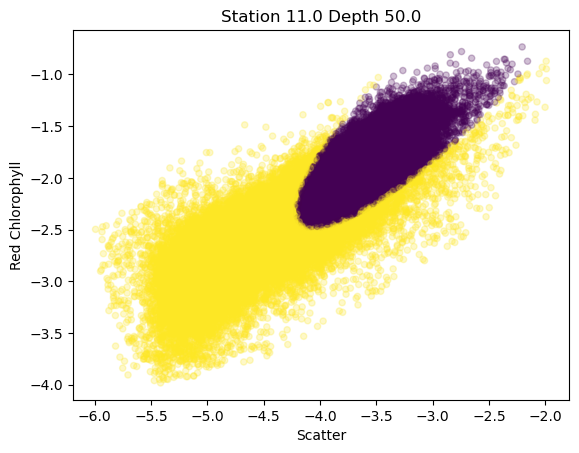

[0.15352232 0.84647768]


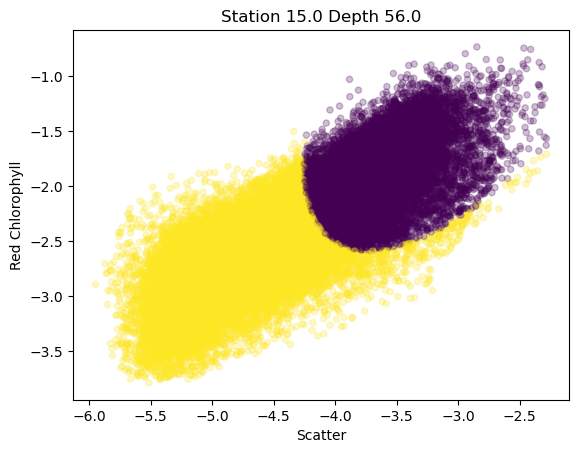

[0.84144357 0.15855643]


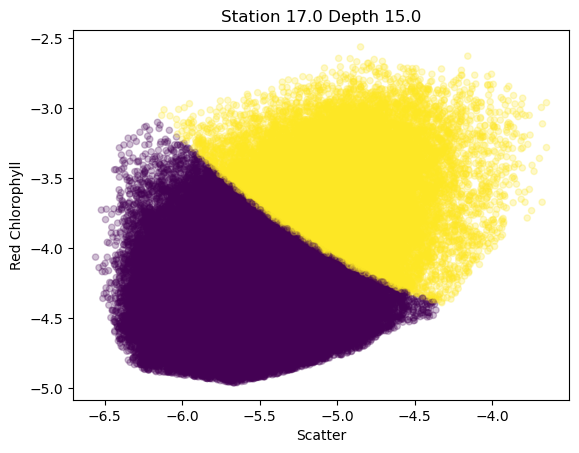

[0.1577919  0.78079093 0.06141718]


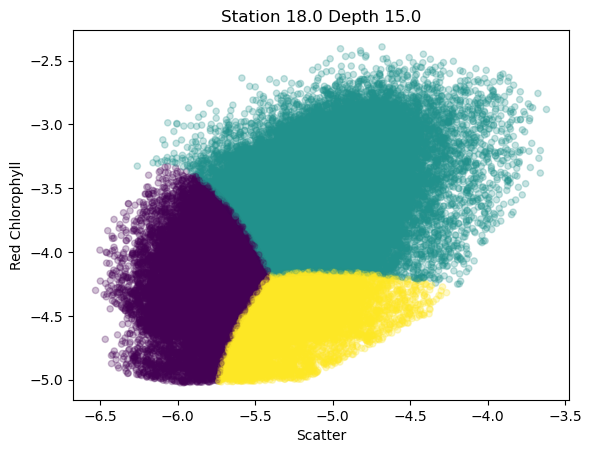

[0.9463823 0.0536177]


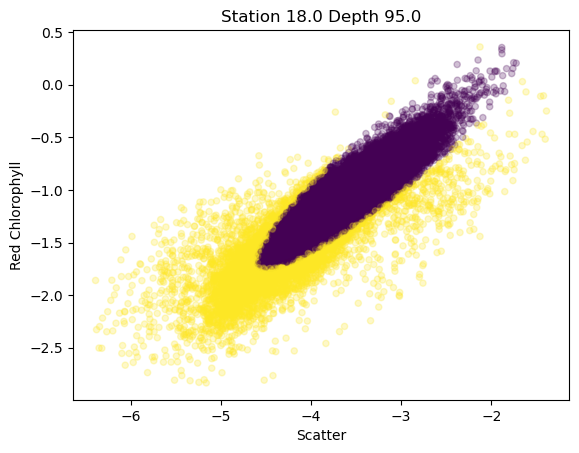

In [18]:
for i in unique_pro_g2_sample:
    current_rel_abun_df = new_g2_ecotype_pro.loc[new_g2_ecotype_pro['SampleID'] == i]
    if len(current_rel_abun_df['RelAbundance']) >= 2:
        num_clusters = len(current_rel_abun_df['RelAbundance'])
        plt.show(gmm_cluster('pro', 2, i, num_clusters))
    else:
        continue

[0.31839855 0.50754259 0.17405886]


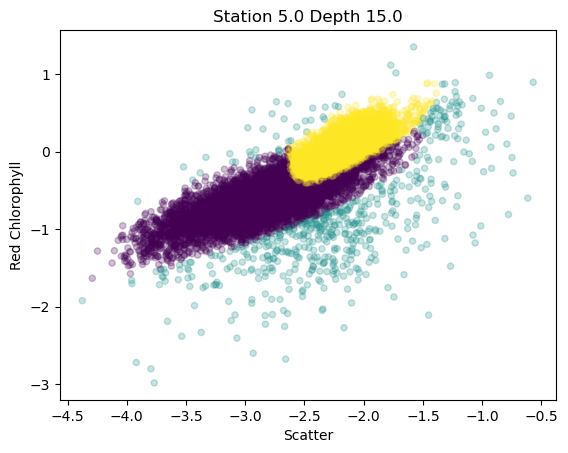

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


[0.11580709 0.88419291]


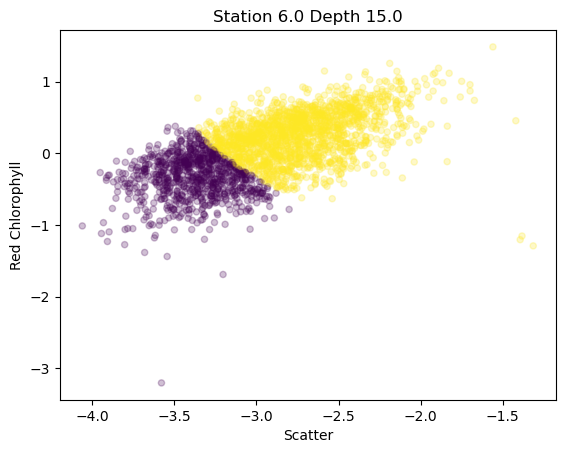

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


[0.50020521 0.49979479]


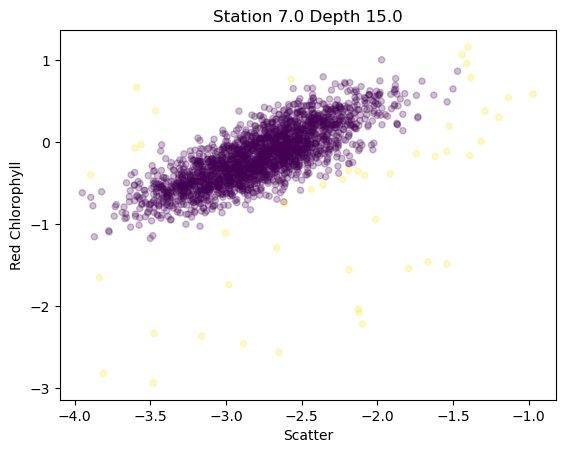

[0.06426108 0.81138154 0.12435738]


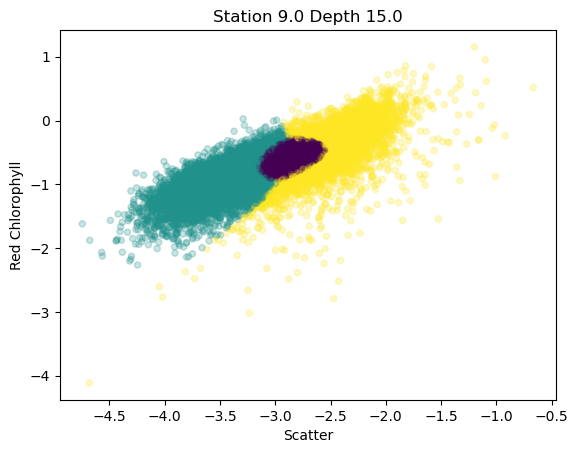

[0.60212732 0.27953563 0.11833705]


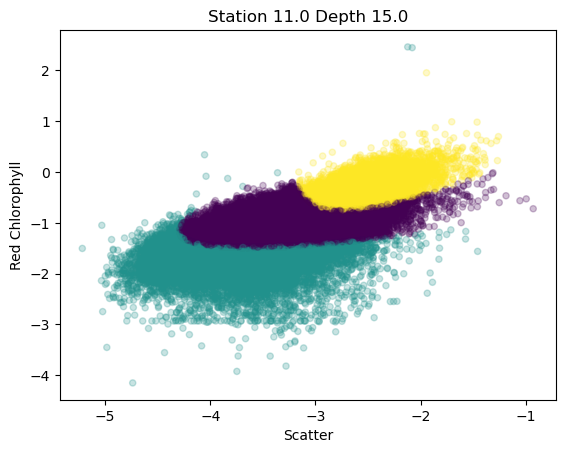

[0.56979858 0.43020142]


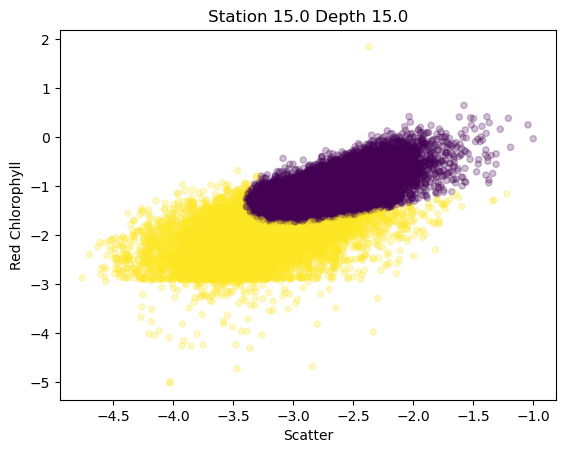

In [19]:
for i in unique_syn_g2_sample:
    current_rel_abun_df = new_g2_ecotype_syn.loc[new_g2_ecotype_syn['SampleID'] == i]
    if len(current_rel_abun_df['RelAbundance']) >= 2:
        num_clusters = len(current_rel_abun_df['RelAbundance'])
        plt.show(gmm_cluster('syn', 2, i, num_clusters))
    else:
        continue

[0.77338312 0.22661688]


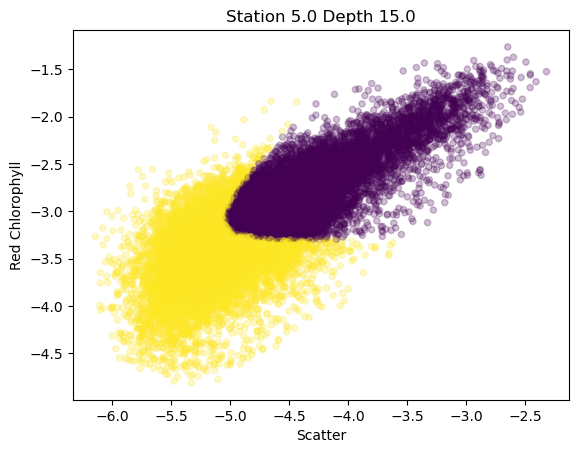

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.3985536 0.6014464]


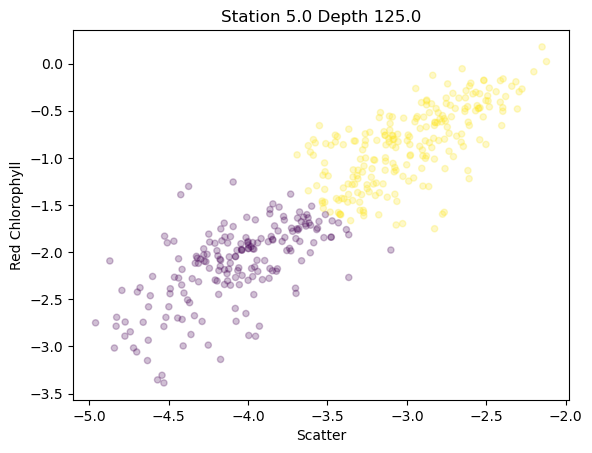

[0.9419483 0.0580517]


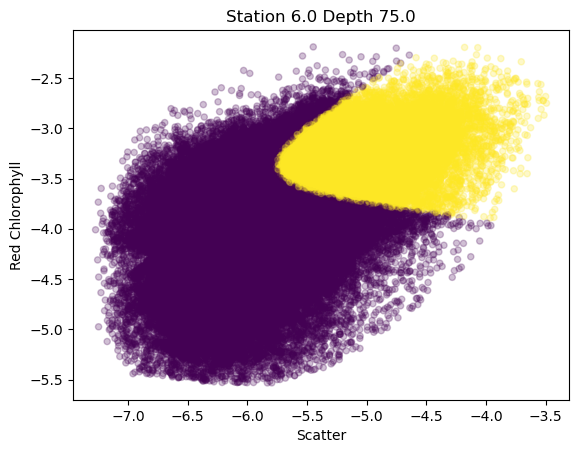

[0.41639914 0.58360086]


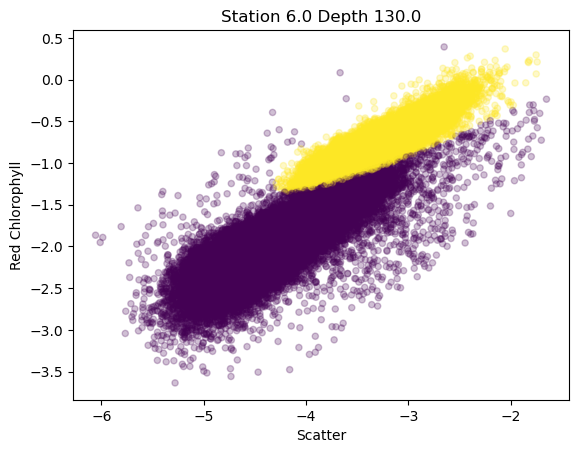

In [20]:
for i in unique_pro_g3_sample:
    current_rel_abun_df = new_g3_ecotype_pro.loc[new_g3_ecotype_pro['SampleID'] == i]
    fcm_df = g3_pro_meta_fcm.loc[g3_pro_meta_fcm['sampleid'] == i]
    if (len(fcm_df) > 0) & (len(current_rel_abun_df['RelAbundance']) >= 2):
        num_clusters = len(current_rel_abun_df['RelAbundance'])
        plt.show(gmm_cluster('pro', 3, i, num_clusters))
    else:
        continue

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


[0.37268296 0.62731704]


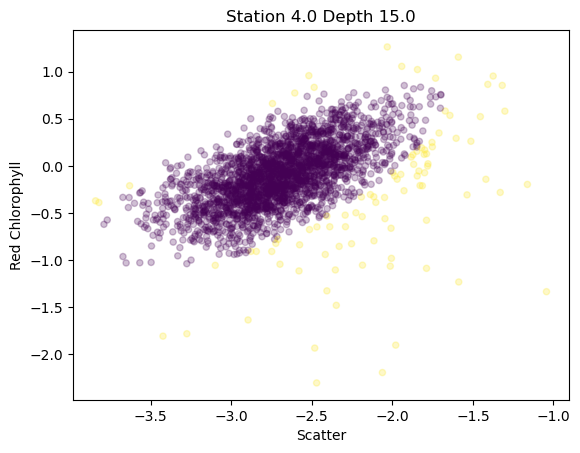

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


[0.29075924 0.70924076]


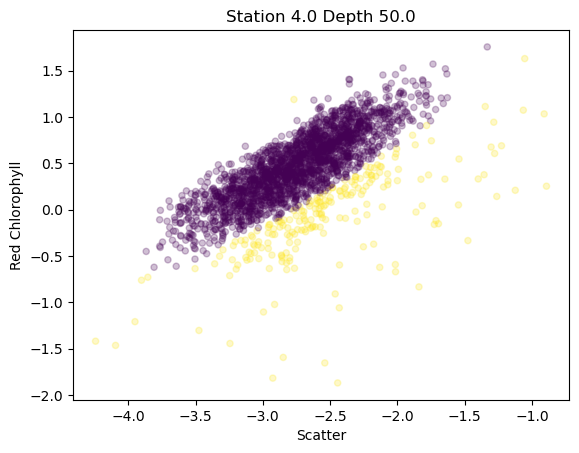

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[0.26613878 0.73386122]


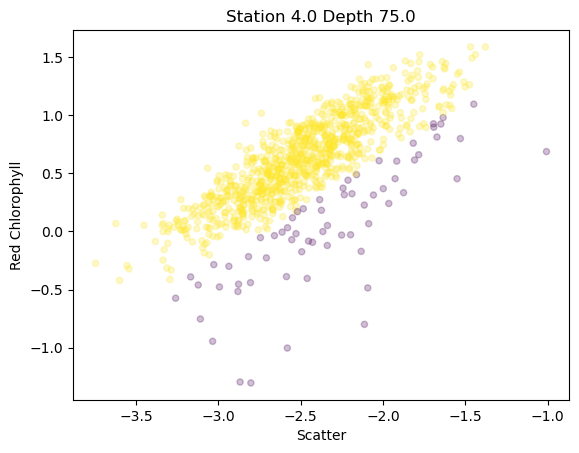

[0.76966411 0.23033589]


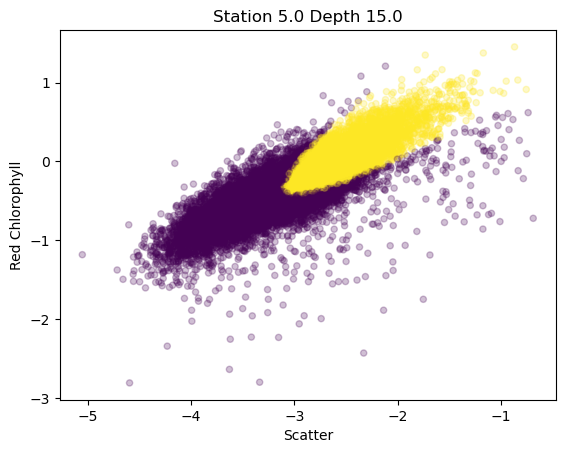

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.20315704 0.65443897 0.14240399]


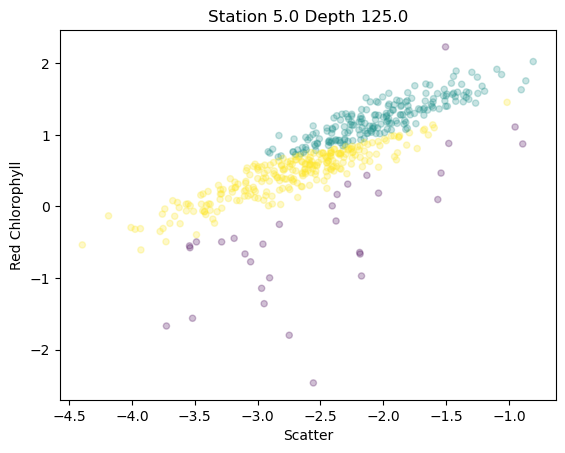

[0.39067233 0.60932767]


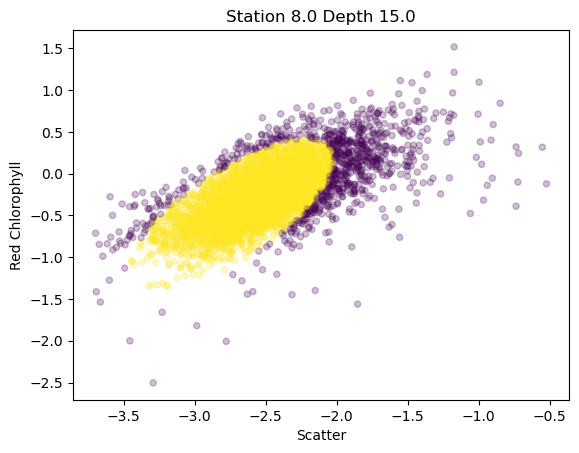

[0.43170249 0.56829751]


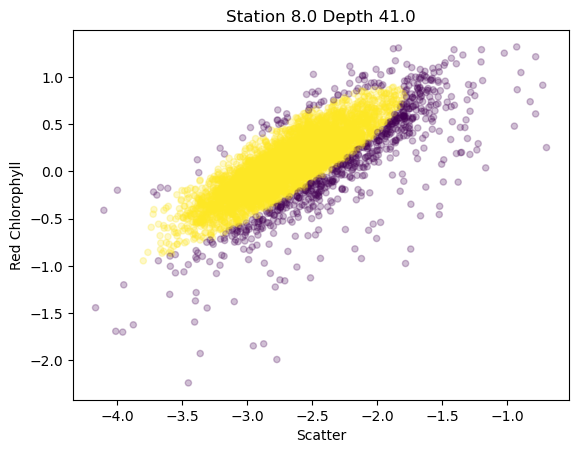

C:\Users\User\anaconda3\envs\IBIS\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[0.33822626 0.66177374]


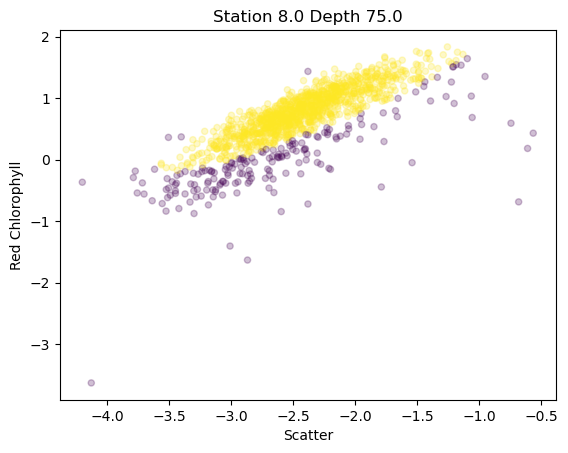

In [21]:
for i in unique_syn_g3_sample:
    current_rel_abun_df = new_g3_ecotype_syn.loc[new_g3_ecotype_syn['SampleID'] == i]
    if len(current_rel_abun_df['RelAbundance']) >= 2:
        num_clusters = len(current_rel_abun_df['RelAbundance'])
        plt.show(gmm_cluster('syn', 3, i, num_clusters))
    else:
        continue